# **Linera Regression Project: Insurance Cost Analysis**

In this project, i will perform analytics operations on an insurance database that uses the below mentioned parameters.
The dataset <a href = 'https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction?resource=download'>is here</a> on Kaggle

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Female or Male|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, i will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, i will be using the following libraries:
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

In [1]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [4]:
df = pd.read_csv('insurance_data.csv')
df.head()

,Age,Gender,BMI,No_fo_Children,Smoker,Region,Charges
0,19.0,1,27.900,0,1,3,16884.92
1,18.0,2,33.770,1,0,4,1725.55
2,28.0,2,33.000,3,0,4,4449.46
3,33.0,2,22.705,0,0,1,21984.47
4,32.0,2,28.880,0,0,1,3866.86


Now, replace the '?' entries with 'NaN' values.


In [35]:
df.replace('?', np.nan, inplace = True)

# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   float64
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_fo_Children  2772 non-null   int64  
 4   Smoker          2772 non-null   int64  
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 151.7 KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [37]:
df['Age'] = df['Age'].astype('float')
avg_age = round(df['Age'].mean(axis = 0))
df['Age'] = df['Age'].replace(np.nan, avg_age)

df['Age'].unique()

array([19., 18., 28., 33., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 34., 59., 63., 55., 22., 26., 35., 24., 41., 38.,
       36., 21., 48., 40., 58., 53., 43., 64., 20., 61., 44., 57., 29.,
       45., 54., 49., 47., 51., 42., 50., 39.])

In [38]:
df.replace('?', np.nan, inplace = True)
most_freq= df['Smoker'].value_counts().idxmax()
df['Smoker'] = df['Smoker'].replace(np.nan, most_freq)

df['Smoker'].unique()

array([1, 0], dtype=int64)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   float64
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_fo_Children  2772 non-null   int64  
 4   Smoker          2772 non-null   int64  
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 151.7 KB


In [40]:
df.head(10)

,Age,Gender,BMI,No_fo_Children,Smoker,Region,Charges
0,19.0,1,27.900,0,1,3,16884.92
1,18.0,2,33.770,1,0,4,1725.55
2,28.0,2,33.000,3,0,4,4449.46
3,33.0,2,22.705,0,0,1,21984.47
4,32.0,2,28.880,0,0,1,3866.86
5,31.0,1,25.740,0,0,4,3756.62
6,46.0,1,33.440,1,0,4,8240.59
7,37.0,1,27.740,3,0,1,7281.51
8,37.0,2,29.830,2,0,2,6406.41
9,60.0,1,25.840,0,0,1,28923.14


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.85800000001)

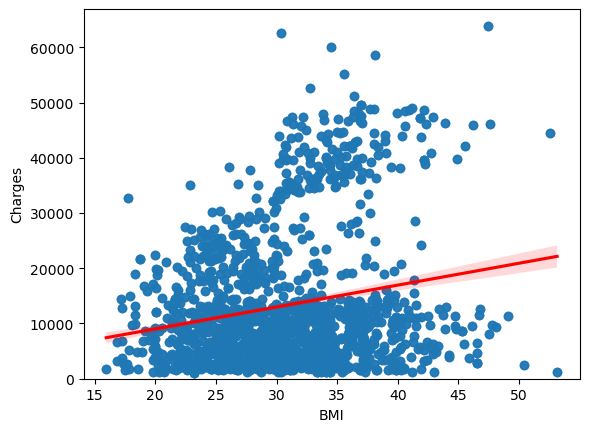

In [41]:
sns.regplot(y = 'Charges', x = 'BMI', data = df, line_kws={"color": "red"})
plt.ylim(0,)

Implement the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='Smoker', ylabel='Charges'>

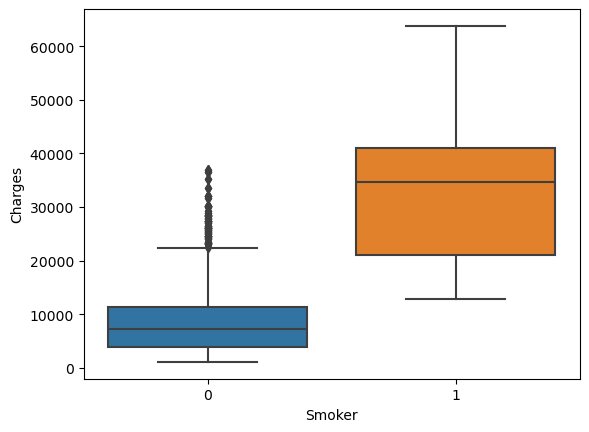

In [42]:
sns.boxplot(x = 'Smoker', y = 'Charges', data = df)

### Inference: 
For sure we notice that the cahrges are extremely hight for smokers

Print the correlation matrix for the dataset.


In [43]:
df[['Smoker', 'Charges']].corr()

,Smoker,Charges
Smoker,1.000000,0.788783
Charges,0.788783,1.000000


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [47]:
x = df[['Smoker']]
y = df['Charges']

x.shape, y.shape

((2772, 1), (2772,))

In [48]:

lre = LinearRegression().fit(x, y)

print("Score R^2 : ", lre.score(x, y))

Score R^2 :  0.6221791733924185


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [46]:
Z = df.drop('Charges', axis = 1)
lre.fit(Z, y)
print("Score R^2 : ", lre.score(Z, y))

Score R^2 :  0.7504083820289634


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [49]:
Input = [
    ('scale', StandardScaler()),
    ('preprocessing', PolynomialFeatures()),
    ('model', LinearRegression())
]

pipe = Pipeline(Input)

pipe.fit(Z, y)

y_hat_pipe = pipe.predict(Z)

print("MSE: ", mean_squared_error(y, y_hat_pipe))
print("R^2: ", r2_score(y, y_hat_pipe))

MSE:  22849023.41901313
R^2:  0.845209132295055


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [50]:
x_data = df.drop('Charges', axis = 1)
y_data = df['Charges']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)

print('Number of samples for the TRAIN : ', x_train.shape[0])
print('Number of samples for the TEST : ', x_test.shape[0])

Number of samples for the TRAIN :  2217
Number of samples for the TEST :  555


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [51]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
y_hat_ridge = RidgeModel.predict(x_test)

print('SCORE R^2: ', r2_score(y_test, y_hat_ridge))

SCORE R^2:  0.6760807731582408


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [52]:
pr = PolynomialFeatures(degree = 2)

x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RidgeModel.fit(x_train_pr, y_train)
yhat = RidgeModel.predict(x_test_pr)

r2_score(y_test, yhat)

0.7835631107608149

<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/kossibrunoamah">AMAH KOSSI BRUNO</a>, an Operation Research and Decision Science student à <a href ='https://insea.ac.ma/'>National Institute of Statistics and Applied Economics (INSEA), Rabat</a>
